In [1]:
# Upload chosen_features_weka.csv
from google.colab import files
files.upload()

Saving chosen_features_weka.csv to chosen_features_weka.csv


{'chosen_features_weka.csv': b'logged_in,dst_host_srv_count,dst_host_srv_serror_rate,xAttack\r\n0,25,0.0,benign\r\n0,1,0.0,benign\r\n0,26,1.0,malicious\r\n1,255,0.01,benign\r\n1,255,0.0,benign\r\n0,19,0.0,malicious\r\n0,9,1.0,malicious\r\n0,15,1.0,malicious\r\n0,23,1.0,malicious\r\n0,13,1.0,malicious\r\n0,12,0.0,malicious\r\n0,13,1.0,malicious\r\n1,219,0.0,benign\r\n1,20,0.0,malicious\r\n0,1,1.0,malicious\r\n0,2,1.0,malicious\r\n1,255,0.0,benign\r\n0,16,0.0,malicious\r\n1,255,0.0,benign\r\n1,255,0.0,benign\r\n0,23,1.0,malicious\r\n0,17,1.0,malicious\r\n1,255,0.0,benign\r\n0,1,0.0,benign\r\n0,2,1.0,malicious\r\n1,25,0.0,benign\r\n0,13,1.0,malicious\r\n1,255,0.0,benign\r\n1,255,0.0,benign\r\n1,255,0.0,benign\r\n0,53,0.0,malicious\r\n0,59,1.0,malicious\r\n1,255,0.0,benign\r\n0,1,0.0,malicious\r\n0,250,0.0,benign\r\n0,5,0.0,benign\r\n0,255,0.0,benign\r\n0,17,1.0,malicious\r\n1,255,0.0,benign\r\n0,13,1.0,malicious\r\n0,63,1.0,malicious\r\n0,9,1.0,malicious\r\n1,147,0.0,benign\r\n0,2,0.0,ben

In [2]:
# Define a function to print accuracy graphs
def print_graphs(history): 
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('chosen_features_weka.csv')

# Change labels to binary
dataset['xAttack'] = np.where(dataset['xAttack'] == 'benign', 0, 1)
dataset.head()

,logged_in,dst_host_srv_count,dst_host_srv_serror_rate,xAttack
0,0,25,0.00,0
1,0,1,0.00,0
2,0,26,1.00,1
3,1,255,0.01,0
4,1,255,0.00,0


In [4]:
# Split into test and train set
from sklearn.model_selection import train_test_split
X, y = dataset[['logged_in', 'dst_host_srv_count', 'dst_host_srv_serror_rate']], dataset[['xAttack']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Reshape dataset
X_train = X_train.values.reshape(-1, 1, 3)
X_test  = X_test.values.reshape(-1, 1, 3)
y_train = y_train.values.reshape(-1, 1, 1)
y_test = y_test.values.reshape(-1, 1, 1)

In [34]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

model_complex = tensorflow.keras.models.Sequential()
model_complex.add(tensorflow.keras.layers.LSTM(100, input_shape=(1, 3), activation='relu', return_sequences=True))
model_complex.add(Dropout(0.2))

model_complex.add(LSTM(100))
model_complex.add(Dropout(0.2))
model_complex.add(Dense(32, activation='relu'))
model_complex.add(Dropout(0.2))


model_complex.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))
model_complex.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model_complex.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 100)            41600     
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)               

In [36]:
history = model_complex.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
1555/1555 [==============================] - 16s 8ms/step - loss: 0.3312 - accuracy: 0.8665 - val_loss: 0.3017 - val_accuracy: 0.8806
Epoch 2/50
1555/1555 [==============================] - 12s 8ms/step - loss: 0.3076 - accuracy: 0.8757 - val_loss: 0.2959 - val_accuracy: 0.8804
Epoch 3/50
1555/1555 [==============================] - 12s 8ms/step - loss: 0.3051 - accuracy: 0.8758 - val_loss: 0.2937 - val_accuracy: 0.8807
Epoch 4/50
1555/1555 [==============================] - 12s 8ms/step - loss: 0.3023 - accuracy: 0.8766 - val_loss: 0.2974 - val_accuracy: 0.8808
Epoch 5/50
1555/1555 [==============================] - 12s 8ms/step - loss: 0.3009 - accuracy: 0.8774 - val_loss: 0.2920 - val_accuracy: 0.8817
Epoch 6/50
1555/1555 [==============================] - 12s 8ms/step - loss: 0.3003 - accuracy: 0.8775 - val_loss: 0.3149 - val_accuracy: 0.8725
Epoch 7/50
1555/1555 [==============================] - 12s 8ms/step - loss: 0.2989 - accuracy: 0.8778 - val_loss: 0.2966 - val_ac

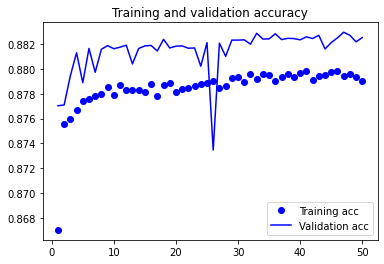

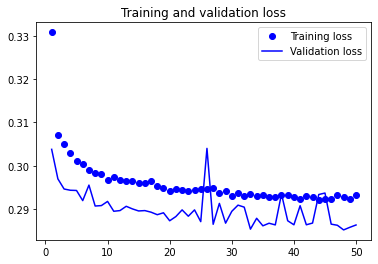

In [24]:
print_graphs(history)

In [37]:
model_simple = tensorflow.keras.models.Sequential()
model_simple.add(tensorflow.keras.layers.LSTM(100, input_shape=(1, 3), activation='relu', return_sequences=True))
model_simple.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))
model_simple.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_simple.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 1, 100)            41600     
_________________________________________________________________
dense_9 (Dense)              (None, 1, 1)              101       
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model_simple.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
1555/1555 [==============================] - 8s 4ms/step - loss: 0.3354 - accuracy: 0.8649 - val_loss: 0.3042 - val_accuracy: 0.8778
Epoch 2/50
1555/1555 [==============================] - 6s 4ms/step - loss: 0.3037 - accuracy: 0.8756 - val_loss: 0.2949 - val_accuracy: 0.8809
Epoch 3/50
1555/1555 [==============================] - 6s 4ms/step - loss: 0.3007 - accuracy: 0.8760 - val_loss: 0.2971 - val_accuracy: 0.8804
Epoch 4/50
1555/1555 [==============================] - 6s 4ms/step - loss: 0.3005 - accuracy: 0.8763 - val_loss: 0.3007 - val_accuracy: 0.8795
Epoch 5/50
1555/1555 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8766 - val_loss: 0.2973 - val_accuracy: 0.8811
Epoch 6/50
1555/1555 [==============================] - 7s 4ms/step - loss: 0.2987 - accuracy: 0.8773 - val_loss: 0.2971 - val_accuracy: 0.8811
Epoch 7/50
1555/1555 [==============================] - 6s 4ms/step - loss: 0.2972 - accuracy: 0.8780 - val_loss: 0.2951 - val_accuracy:

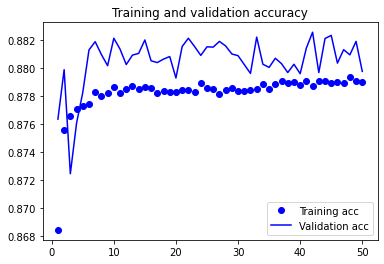

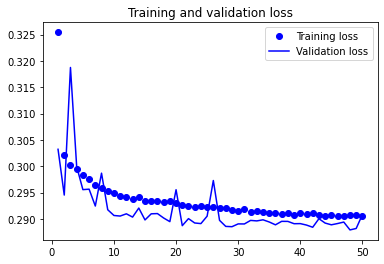

In [27]:
print_graphs(history)

## Get classification metrics on test set

In [52]:
# Get metrics for model_simple
true_positive, true_negative, false_positive, false_negative = 0, 0, 0, 0

for index in range(len(X_test)): 
  test_row = X_test[index,]
  test_row = test_row.reshape(-1, 1, 3)
  predicted_prob = model_simple.predict(test_row)[0][0][0]

  predicted_label = None
  if predicted_prob >= 0.50: 
    predicted_label = 1
  else: 
    predicted_label = 0

  actual_label = y_test[index][0][0]

  if actual_label == 1 and predicted_label == 1:
      true_positive += 1
  elif actual_label == 0 and predicted_label == 0:
      true_negative += 1
  elif actual_label == 1 and predicted_label == 0:
      false_negative += 1
  elif actual_label == 0 and predicted_label == 1:
      false_positive += 1
  else:
      print('error')

  if index % 1000 == 0:
    print(index)

# Print confusion matrix
data = {'Predicted Benign':[true_negative, false_positive],
        'Predicted Malicious':[false_negative, true_positive]}
df = pd.DataFrame(data, index =['Actual Benign',
                                'Actual Malicious',
                               ])
df  

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


,Predicted Benign,Predicted Malicious
Actual Benign,22360,2749
Actual Malicious,2995,20907


In [54]:
# Print other classification metrics for model_simple
print('Accuracy:', (true_positive + true_negative) / len(X_test))
print('Precision:', (true_positive) / (true_positive + false_positive))
print('Recall:', (true_positive) / (true_positive + false_negative))

Accuracy: 0.882801819999592
Precision: 0.8746966781022508
Recall: 0.8837926952992898


0.06705746

In [59]:
# Get metrics for model_complex
true_positive, true_negative, false_positive, false_negative = 0, 0, 0, 0

for index in range(len(X_test)): 
  test_row = X_test[index,]
  test_row = test_row.reshape(-1, 1, 3)
  predicted_prob = model_complex.predict(test_row)[0][0]

  predicted_label = None
  if predicted_prob >= 0.50: 
    predicted_label = 1
  else: 
    predicted_label = 0

  actual_label = y_test[index][0][0]

  if actual_label == 1 and predicted_label == 1:
      true_positive += 1
  elif actual_label == 0 and predicted_label == 0:
      true_negative += 1
  elif actual_label == 1 and predicted_label == 0:
      false_negative += 1
  elif actual_label == 0 and predicted_label == 1:
      false_positive += 1
  else:
      print('error')

  if index % 1000 == 0:
    print(index)

# Print confusion matrix
data = {'Predicted Benign':[true_negative, false_positive],
        'Predicted Malicious':[false_negative, true_positive]}
df = pd.DataFrame(data, index =['Actual Benign',
                                'Actual Malicious',
                               ])
df  

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


,Predicted Benign,Predicted Malicious
Actual Benign,22174,2572
Actual Malicious,3181,21084


In [60]:
# Print other classification metrics for model_complex
print('Accuracy:', (true_positive + true_negative) / len(X_test))
print('Precision:', (true_positive) / (true_positive + false_positive))
print('Recall:', (true_positive) / (true_positive + false_negative))

Accuracy: 0.8826181877537695
Precision: 0.8689058314444673
Recall: 0.891274940818397
